***
<a class="anchor" id="tutorial1"></a>
## Encoders and decoders

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Loading data and preprocessing

In [5]:
# Load Fashion MNIST

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
class_names = np.array(['T-shirt/top', 'Trouser/pants', 'Pullover shirt', 'Dress',
                        'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot'])

## Show a sample from dataset

(60000, 28, 28)


Text(0.5, 1.0, 'Trouser/pants')

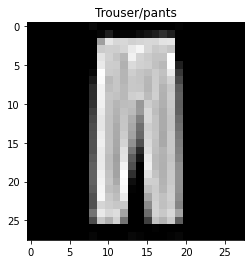

In [13]:
print(str(x_train.shape))
idx = 21
plt.imshow(x_train[idx],cmap='gray')
plt.title(class_names[y_train[idx]])

## Seperate 1000 example samples and Show 5 samples from example dataset

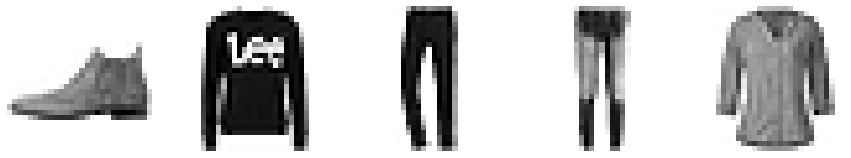

In [14]:
# Display a few examples

n_examples = 1000
example_images = x_test[0:n_examples]
example_labels = y_test[0:n_examples]

f, axs = plt.subplots(1, 5, figsize=(15, 4))
for j in range(len(axs)):
    axs[j].imshow(example_images[j], cmap='binary')
    axs[j].axis('off')
    


# Create Network
## 1- Encoder

In [16]:
# Define the encoder
# - Flatten
# - Dense 256 - activation = sigmoid
# - Dense 64 - activation = sigmoid
# - Dense 2 (encoder_dim)
encoder_dim = 2

encoder = tf.keras.models.Sequential([
    ...
])


## Displaying Hidden space for example images

In [28]:
# Encode examples before training
pretrain_example_encodings = encoder(example_images).numpy()
print(pretrain_example_encodings.shape)

(1000, 2)


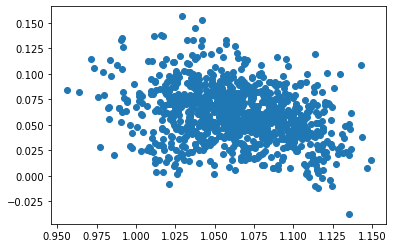

In [18]:
plt.scatter(pretrain_example_encodings[:,0],pretrain_example_encodings[:,1])

C:\ProgramData\Anaconda3\envs\tf2_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


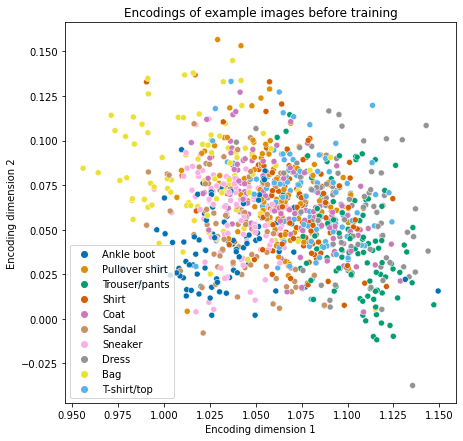

In [19]:
# Plot encoded examples before training 

f, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.scatterplot(pretrain_example_encodings[:, 0],
                pretrain_example_encodings[:, 1],
                hue=class_names[example_labels], ax=ax,
                palette=sns.color_palette("colorblind", 10));
ax.set_xlabel('Encoding dimension 1'); ax.set_ylabel('Encoding dimension 2')
ax.set_title('Encodings of example images before training');

## 2 - Decoder

In [20]:
# Define the decoder
# input_shape = (encode_dim, )
# Dense 64
# Dense 256
# Reshape to image size
decoder = tf.keras.models.Sequential([
    .... 
])


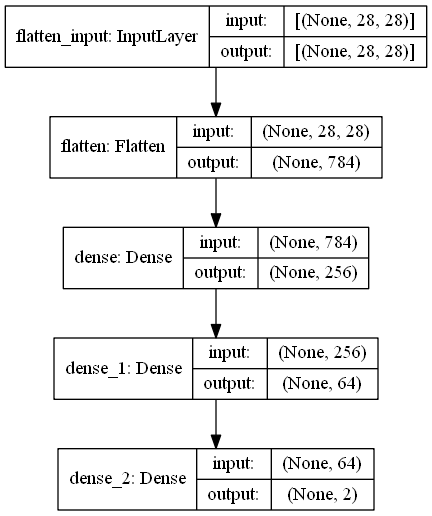

In [21]:
tf.keras.utils.plot_model(encoder,show_shapes=True)

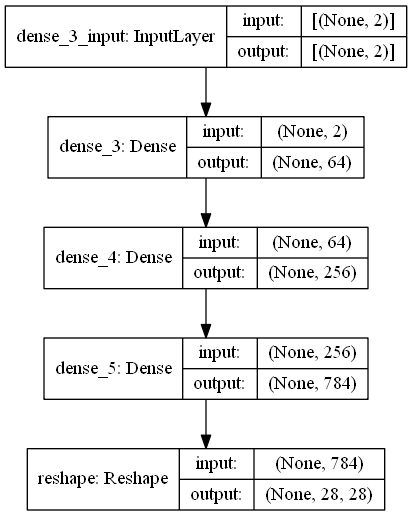

In [22]:
tf.keras.utils.plot_model(decoder, show_shapes=True)

## Define Autoencoder Model

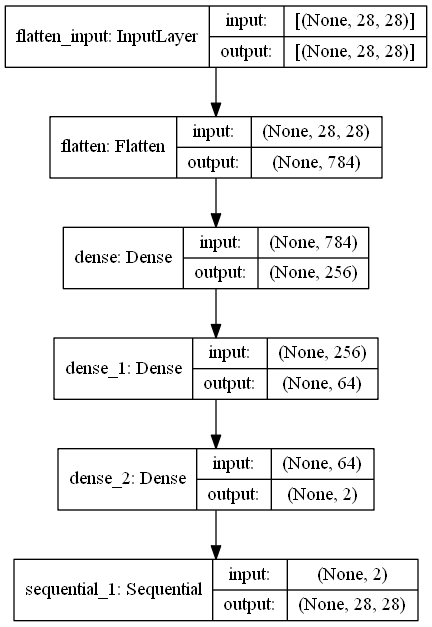

In [25]:
model = tf.keras.models.Model(inputs = encoder.inputs, outputs = decoder(encoder.outputs))
tf.keras.utils.plot_model(model, show_shapes=True)

In [26]:
# Compile and fit the model
model = tf.keras.models.Model(inputs=encoder.inputs, outputs = decoder(encoder.outputs))
model.compile(loss = 'binary_crossentropy')

# Specify loss - input and output is in [0., 1.], so we can use a binary cross-entropy loss


# Fit model - highlight that labels and input are the same
model.fit(x = x_train, y= x_train, epochs = 10, batch_size = 32)


Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3830
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3404
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3331
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3295
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3269
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3250
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3233
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3221
Epoch 9/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3211
Epoch 10/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3204


# Display Hidden Space after training

In [30]:
# Compute example encodings after training
pretrain_example_encodings = encoder(example_images).numpy()



C:\ProgramData\Anaconda3\envs\tf2_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'posttrain_example_encodings' is not defined

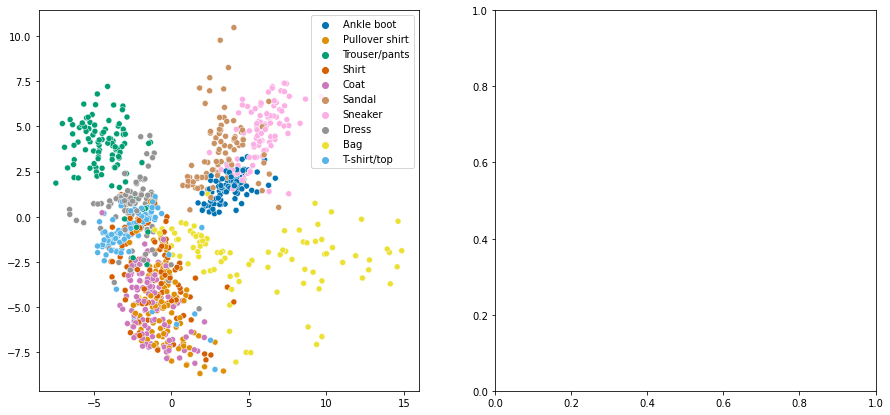

In [31]:
# Compare the example encodings before and after training

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
sns.scatterplot(pretrain_example_encodings[:, 0],
                pretrain_example_encodings[:, 1],
                hue=class_names[example_labels], ax=axs[0],
                palette=sns.color_palette("colorblind", 10));
sns.scatterplot(posttrain_example_encodings[:, 0],
                posttrain_example_encodings[:, 1],
                hue=class_names[example_labels], ax=axs[1],
                palette=sns.color_palette("colorblind", 10));

axs[0].set_title('Encodings of example images before training');
axs[1].set_title('Encodings of example images after training');

for ax in axs: 
    ax.set_xlabel('Encoding dimension 1')
    ax.set_ylabel('Encoding dimension 2')
    ax.legend(loc='lower right')

In [32]:
# Compute the autoencoder's reconstructions
reconstructed_example_images = model(example_images).numpy()



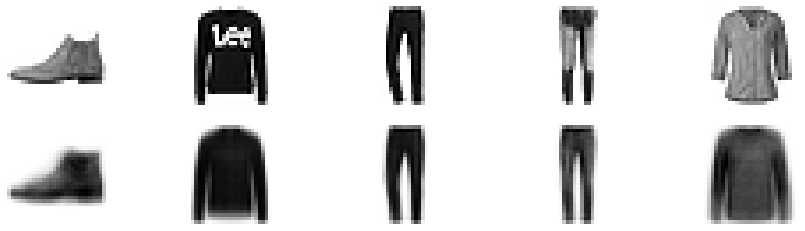

In [33]:
# Evaluate the autoencoder's reconstructions

f, axs = plt.subplots(2, 5, figsize=(15, 4))
for j in range(5):
    axs[0, j].imshow(example_images[j], cmap='binary')
    axs[1, j].imshow(reconstructed_example_images[j].squeeze(), cmap='binary')
    axs[0, j].axis('off')
    axs[1, j].axis('off')

(3, 2)


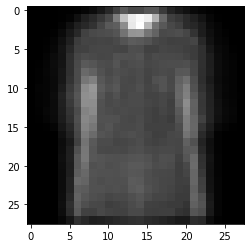

In [34]:
z = np.random.normal(size=(3,2))
print(z.shape)
img = decoder(z)

plt.imshow(img[1,:,:],cmap='gray')

# Variational Auto Encoders

In [ ]:
import tensorflow_probability as tfp


tfd = tfp.distributions
tfpl = tfp.layers
tfb = tfp.bijectors
print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

In [ ]:
# Import Fasion MNIST, make it a TensorFlow Dataset

(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
example_x = x_test[:16]

batch_size = 64
x_train = tf.data.Dataset.from_tensor_slices(x_train).batch(batch_size)

In [ ]:
# Define the encoding distribution, q(z|x)
latent_size = 2
event_shape = (28, 28)

encoder = tf.keras.models.Sequential([
    Flatten(input_shape = event_shape),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(2*latent_size),
    tfpl.DistributionLambda(
        lambda t: tfd.MultivariateNormalDiag(
            loc = t[..., :latent_size],
            scale_diag = tf.math.exp(t[..., latent_size:])
        )
    )
    
])


In [ ]:
# Pass an example image through the network - should return a batch of MultivariateNormalDiags.

encoder(example_x)

In [ ]:
# Define the decoding distribution, p(x|z)
decoder = tf.keras.models.Sequential([
    Dense(32, input_shape = (latent_size,), activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(tfpl.IndependentBernoulli.params_size(event_shape)),
    tfpl.IndependentBernoulli(event_shape)
])


In [ ]:
# Pass a batch of examples to the decoder
decoder(tf.random.normal([16, latent_size]))


In [ ]:
# Define the prior, p(z) - a standard bivariate Gaussian

prior = tfd.MultivariateNormalDiag(loc = tf.zeros(latent_size))

The loss function we need to estimate is

\begin{equation}
-\mathrm{ELBO} = \mathrm{KL}[ \ q(z|x) \ || \ p(z) \ ] - \mathrm{E}_{Z \sim q(z|x)}[\log p(x|Z)]\\
\end{equation}

where $x = (x_1, x_2, \ldots, x_n)$ refers to all observations, $z = (z_1, z_2, \ldots, z_n)$ refers to corresponding latent variables.

Assumed independence of examples implies that we can write this as

\begin{equation}
\sum_j \mathrm{KL}[ \ q(z_j|x_j) \ || \ p(z_j) \ ] - \mathrm{E}_{Z_j \sim q(z_j|x_j)}[\log p(x_j|Z_j)]
\end{equation}

In [ ]:
# Specify the loss function, an estimate of the -ELBO

def loss(x, encoding_dist, sampled_decodeing_dist, prior):
    return tf.reduce_sum(
        tfd.kl_divergence(encoding_dist, prior) - sampled_decodeing_dist.log_prob(x)
    )

In [ ]:
# Define a function that returns the loss and its gradients

@tf.function
def get_loss_and_grads(x):
    with tf.GradientTape() as tape:
        posterior_dist = encoder(x)
        sampled_z = posterior_dist.sample()
        x_given_z_dist = decoder(sampled_z)
        current_loss = loss(x, posterior_dist, x_given_z_dist, prior)
    grads = tape.gradient(current_loss, 
                          encoder.trainable_variables + decoder.trainable_variables)
    return current_loss, grads

In [ ]:
# Compile and train the model

num_epochs = 5
opt = tf.keras.optimizers.Adam()
for i in range(num_epochs):
    for train_batch in x_train:
        current_loss, grads = get_loss_and_grads(train_batch)
        opt.apply_gradients(zip(grads, encoder.trainable_variables
                                       + decoder.trainable_variables))
        
    print('-ELBO after epoch {}: {:.0f}'.format(i+1, current_loss.numpy()))

In [ ]:
# Connect encoder and decoder, compute a reconstruction
def vae(inputs):
    approx_posterior = encoder(inputs)
    decoding_dist = decoder(approx_posterior.sample())
    return decoding_dist.mean()

example_reconstruction = vae(example_x).numpy().squeeze


In [ ]:
# Plot examples against reconstructions

f, axs = plt.subplots(2, 6, figsize=(16, 5))

for j in range(6):
    axs[0, j].imshow(example_x[j, :, :].squeeze(), cmap='binary')
    axs[1, j].imshow(example_reconstruction[j, :, :], cmap='binary')
    axs[0, j].axis('off')
    axs[1, j].axis('off')

In [ ]:
# Generate an example - sample a z value, then sample a reconstruction from p(x|z)



In [ ]:
# Display generated_x

f, axs = plt.subplots(1, 6, figsize=(16, 5))
for j in range(6):
    axs[j].imshow(generated_x[j, :, :].numpy().squeeze(), cmap='binary')
    axs[j].axis('off')

In [ ]:
# -ELBO estimate using an estimate of the KL divergence

def loss(x, encoding_dist, sampled_decoding_dist,
         prior, sampled_z):
    recon_loss = -sampled_decoding_dist.log_prob(x)
    kl_approx = (encoding_dist.log_prob(sampled_z)
                    - prior.log_prob(sampled_z))
    return tf.reduce_sum(kl_approx + recon_loss)